<a href="https://colab.research.google.com/github/SowmyaLR/Statistics-for-ML/blob/pandemic-visualization/u5mr/india/india_under_5_mortality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('under_5_mortality.csv')

In [5]:
data.describe(include='all')

,Model Used,Reference Area,REF_AREA,Indicator,Sex,Series Name,Series Category,Series Method,Series Type,Age Group of Women,Time Since First Birth,Series Year,Observation Status,Interval,Reference Date,Observation value,Standard Error,Unit of Measure,Lower Bound,Upper Bound
count,66,316,316,316,316,316,250,250,250,96,0.0,316,316,220.000000,316.000000,316.000000,84.000000,316,66.000000,66.000000
unique,1,1,1,1,1,23,4,3,3,6,NaN,19,3,NaN,NaN,NaN,NaN,1,NaN,NaN
top,B3,India,IND,Under-five mortality rate,Total,UN IGME estimate 2019,DHS,Survey/Census with Summary Birth Histories,Indirect,35 to 39 years old,NaN,2019,Included in IGME,NaN,NaN,NaN,NaN,Deaths per 1000 live births,NaN,NaN
freq,66,316,316,316,316,66,101,96,96,18,NaN,66,148,NaN,NaN,NaN,NaN,316,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.054545,1981.667722,150.410069,4.707668,NaN,139.519290,158.599123
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.227609,22.898988,76.048745,2.022775,NaN,64.589321,80.365383
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1911.500000,36.574240,1.274445,NaN,32.667842,40.386634
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1972.500000,98.375000,3.575000,NaN,82.138936,88.802604
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1986.500000,131.200000,4.400000,NaN,138.625629,148.885896
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1996.650000,186.575000,5.950000,NaN,205.573174,226.151563


In [8]:
len(data)

316

In [11]:
data.columns

Index(['Model Used', 'Reference Area', 'REF_AREA', 'Indicator', 'Sex',
       'Series Name', 'Series Category', 'Series Method', 'Series Type',
       'Age Group of Women', 'Time Since First Birth', 'Series Year',
       'Observation Status', 'Interval', 'Reference Date', 'Observation value',
       'Standard Error', 'Unit of Measure', 'Lower Bound', 'Upper Bound'],
      dtype='object')

In [18]:
data['Series Year'].unique()

array(['2019', '2011', '2001', '1991', '1981', '2017', '2015-2016',
       '2008', '2005-2006', '2004', '1999', '1998-1999', '1992-1993',
       '1980', '1979', '1972', '1970', '1966', '1947'], dtype=object)

In [12]:
drop_data = data[['Lower Bound', 'Upper Bound']].dropna()

In [14]:
drop_data.columns

Index(['Lower Bound', 'Upper Bound'], dtype='object')

In [19]:
def process_year(cell):
  value = cell.split('-')
  return int(value[0])

In [22]:
data['Series Year'] = data['Series Year'].apply(lambda x: process_year(x))

In [42]:
sct_plot = data[['Series Year', 'Observation value']].groupby(['Series Year'])['Observation value'].agg('mean')

In [43]:
sct_plot = sct_plot.reset_index()

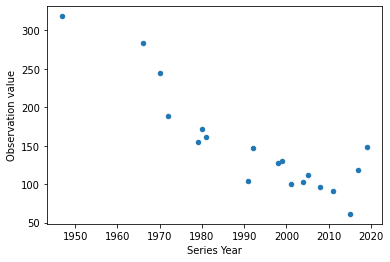

In [45]:
sct_plot.plot(kind='scatter', x='Series Year', y='Observation value')

In [46]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


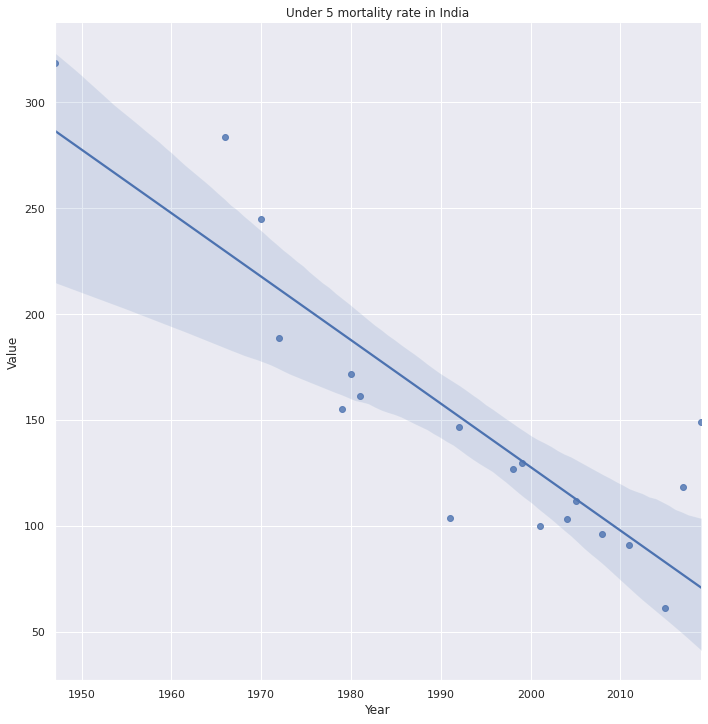

In [64]:
ax = sns.lmplot(x='Series Year', y='Observation value', data=sct_plot,height=10)
ax.set(xlabel="Year", ylabel = "Value", title='Under 5 mortality rate in India')

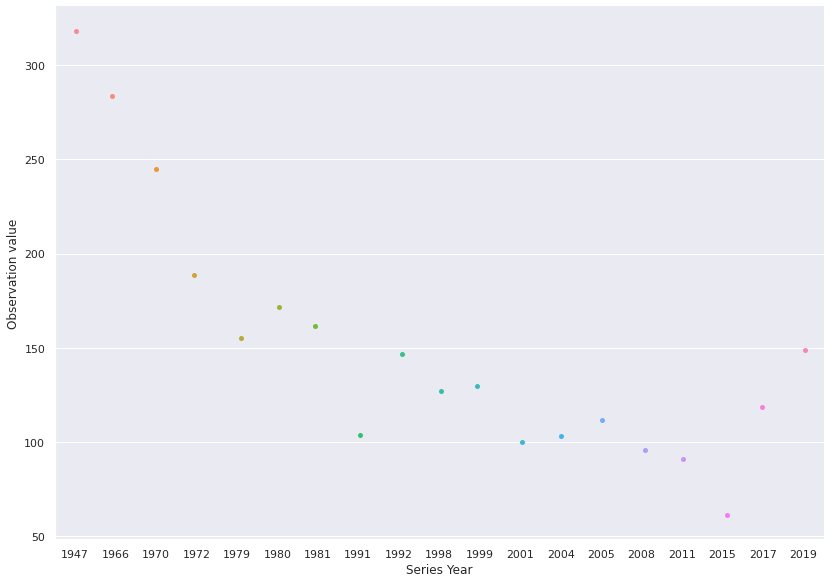

In [57]:
sns.catplot(data=sct_plot, x='Series Year', y='Observation value', 
    height=8.27, aspect=11.7/8.27)